In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

veriler=pd.read_csv("musteriler.csv")
veriler

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [77]:
X=veriler.iloc[:,3:].values
X

array([[ 69900,   6325],
       [ 79000,   5200],
       [ 85500,   7825],
       [ 17100,   8375],
       [  5500,   5450],
       [ 27200,   8550],
       [ 20500,   4500],
       [ 69000,   5050],
       [ 13200,   8325],
       [ 31800,   5975],
       [ 59200,   5700],
       [ 95800,   6475],
       [ 46200,   3850],
       [ 29800,   4100],
       [ 83000,   8125],
       [143500,   8650],
       [ 91300,   5125],
       [  9800,   3950],
       [ 79500,   5325],
       [ 66400,   5775],
       [ 25900,   3400],
       [     0,   7075],
       [ 90900,   5725],
       [ 51800,   4300],
       [126800,   7500],
       [ 40800,   5000],
       [ 26400,   5325],
       [ 76100,   5350],
       [ 26500,   2600],
       [ 37200,   6250],
       [  4000,   3075],
       [ 34500,   4875],
       [ 47100,   5525],
       [ 95600,   7225],
       [ 35400,   5275],
       [ 41100,   6050],
       [ 46400,   3425],
       [ 10400,   4600],
       [ 50100,   4575],
       [111300,   8525],


# K Means

In [82]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3 , init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=3)

In [83]:
kmeans.cluster_centers_
#k merkezlerini yazdırır.

array([[104386.95652174,   7289.13043478],
       [ 22069.41176471,   5320.88235294],
       [ 58643.47826087,   5844.92753623]])

In [84]:
wcssDegerleri=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=123)
    kmeans.fit(X)
    wcssDegerleri.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


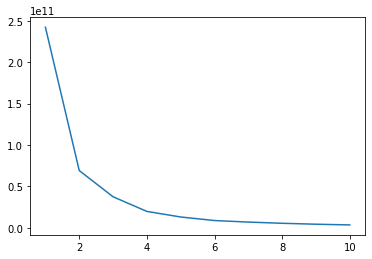

In [85]:
plt.plot(range(1,11),wcssDegerleri)
#2 ve 4 dirsek olabilir.

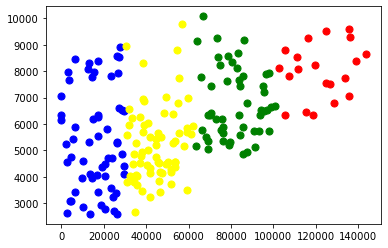

In [87]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=123)

Y_tahmin=kmeans.fit_predict(X)
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=50,c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=50,c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=50,c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=50,c='yellow')

# Hierarchical Bölütleme

In [88]:
from sklearn.cluster import AgglomerativeClustering

In [89]:
ac=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
Y_tahmin=ac.fit_predict(X)

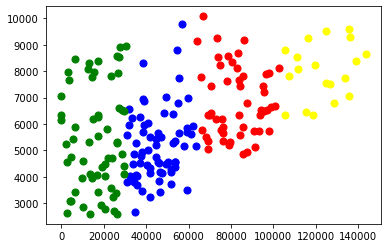

In [90]:
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=50,c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=50,c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=50,c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=50,c='yellow')

scipy  (dendrogram)

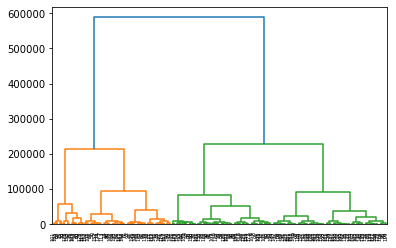

In [91]:
import scipy.cluster.hierarchy as sch 

dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()